# Lab11

## 0. Prerequisite

In [ ]:
!pip install mypy
from IPython.core.magic import register_cell_magic
from IPython import get_ipython
from mypy import api

@register_cell_magic
def mypy(line, cell):
  for output in api.run(['-c', '\n' + cell] + line.split()):
    if output and not output.startswith('Success'):
      raise TypeError(output)
  get_ipython().run_cell(cell)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 9.8 MB/s eta 0:00:00


In [ ]:
# from google.colab import drive

# drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


## User-Defined Classes




In [ ]:
class Rectangle:
  def __init__(self, width=1, height=1):
    self._width = width
    self._height = height
    self.__width = width
    self.__height = height

  def setWidth(self, width):
    self._width = width

  def setHeight(self, height):
    self._height = height

  def getWidth(self):
    return self._width

  def getHeight(self):
    return self._height

  def area(self):
    return self._width * self._height

  def perimeter(self):
    return 2 * (self._width + self._height)    

  def __area(self):
      return self.__width * self.__height

  def __perimeter(self):
      return 2 * (self.__width + self.__height)

  def __str__(self):
    return ("Width: " + str(self._width) + "\nHeight: " + str(self._height))    


In [ ]:
# Create a rectangle of width 4 and height 5
r = Rectangle(4, 5)
print(r) # Uses the __str__ method to report the state
# Create a rectangle with the default values for width and
# height
r = Rectangle()
print(r)
# Create a rectangle of width 4 and default height 1
r = Rectangle(4)
print(r)
r = Rectangle()
# Use the mutator methods.
r.setWidth(4)
r.setHeight(5)
print("The rectangle has the following measurements:")
# Use the accessor methods.
print("Width is", r.getWidth())
print("Height is", r.getHeight())
# Use other methods.
print("Area is", r.area())
print("Perimeter is", r.perimeter())

Width: 4
Height: 5
Width: 1
Height: 1
Width: 4
Height: 1
The rectangle has the following measurements:
Width is 4
Height is 5
Area is 20
Perimeter is 18


In [ ]:
print("Width is", r._width)
print("Height is", r._height)
print("Area is", r.area())
print("Perimeter is", r.perimeter())
r.__dict__.keys()

Width is 4
Height is 5
Area is 20
Perimeter is 18


dict_keys(['_width', '_height', '_Rectangle__width', '_Rectangle__height'])

In [ ]:
print("__Width is", r.__width)
print("__Height is", r.__height)
print("__Area is", r.__area())
print("__Perimeter is", r.__perimeter())

AttributeError: ignored

## LGstudent Class

In [4]:
class LGstudent:
  def __init__(self, name="", midterm=0, final=0):
    self._name = name
    self._midterm = midterm
    self._final = final

  def setName(self, name):
    self._name = name

  def setMidterm(self, midterm):
    self._midterm = midterm

  def setFinal(self, final):
    self._final = final

  def calcSemGrade(self):
    grade = (self.__midterm + self.__final) / 2
    grade = round(grade)
    if grade >= 90: return "A"
    elif grade >= 80: return "B"
    elif grade >= 70: return "C"
    elif grade >= 60: return "D"
    else: return "F"

  def __str__(self):
    return self._name + "\t" + self.calcSemGrade()

In [ ]:
def main():
  ## Calculate and display a student's semester letter grade.
  name = input("Enter student's name: ")
  midterm = float(input("Enter grade on midterm exam: "))
  final = float(input("Enter grade on final exam: "))
  # Create an instance of an LGstudent object.
  st = LGstudent(name, midterm, final)
  print("\nNAME\tGRADE")
  # Display student's name and semester letter grade.
  print(st)

main()

Enter student's name: Kim
Enter grade on midterm exam: 87
Enter grade on final exam: 92

NAME	GRADE
Kim	A


## Lists of Objects

In [ ]:
def main():
  ## Calculate and display students' semester letter grades.
  listOfStudents = [] # To holds objects each for a student
  carryOn = 'Y'
  while carryOn == 'Y': # Repeat until user says 'N'
    st = LGstudent()
    # Obtain student's name and grades.
    name = input("Enter student's name: ")
    midterm = float(input("Enter student's grade on midterm exam: "))
    final = float(input("Enter student's grade on final exam: "))
    # Create an instance of an LGstudent object.
    st = LGstudent(name, midterm, final)
    listOfStudents.append(st)
    # Insert object into list.
    carryOn = input("Do you want to continue (Y/N)? ")
    carryOn = carryOn.upper()
  print("\nNAME\tGRADE")
  # Display students, names and semester letter grades.
  for pupil in listOfStudents:
    print(pupil)

main()

Enter student's name: Kim
Enter student's grade on midterm exam: 70
Enter student's grade on final exam: 60
Do you want to continue (Y/N)? Y
Enter student's name: Lee
Enter student's grade on midterm exam: 50
Enter student's grade on final exam: 30
Do you want to continue (Y/N)? N

NAME	GRADE
Kim	D
Lee	F


## Inheritance

In [ ]:
class Student: # Superclass
  def __init__(self, name="", midterm=0, final=0):
    self.__name = name
    self.__midterm = midterm
    self.__final = final

  def setName(self, name):
    self.__name = name

  def setMidterm(self, midterm):
    self.__midterm = midterm

  def setFinal(self, final):
    self.__final = final

  def getName(self):
    return self.__name

  def calcSemGrade(self):
    pass

  def __str__(self):
    return self.__name + "\t" + self.calcSemGrade()

s = Student()
s.__dict__.keys()
print(s.calcSemGrade())

None


In [ ]:
# letter-grade students
class LGstudent(Student): # Subclass of Student
  def calcSemGrade(self): # override method 오타주의
    average = round((self._midterm + self._final) / 2)
    if average >= 90: return "A"
    elif average >= 80: return "B"
    elif average >= 70: return "C"
    elif average >= 60: return "D"
    else: return "F"

# pass-fail students
class PFstudent(Student): # Subclass of Student
  def calcSemGrade(self):
    average = round((self._midterm + self._final) / 2)
    if average >= 60: return "Pass"
    else: return "Fail"


lg = LGstudent()
pf = PFstudent()

print(lg.__dict__.keys())
print(pf.__dict__.keys())
print(lg.calcSemGrade())
print(pf.calcSemGrade())

dict_keys(['_Student__name', '_midterm', '_final'])
dict_keys(['_Student__name', '_midterm', '_final'])
F
Fail


In [ ]:
def main():
  # students and grades
  listOfStudents = obtainListOfStudents()
  displayResults(listOfStudents)

def obtainListOfStudents():
  listOfStudents = []
  carryOn = 'Y'
  while carryOn == 'Y':
    name = input("Enter student's name: ")
    midterm = float(input("Enter grade on midterm: "))
    final = float(input("Enter grade on final: "))
    category = input("Enter category (LG or PF): ")
    if category.upper() == "LG":
      st = LGstudent(name, midterm, final)
    else:
      st = PFstudent(name, midterm, final)
    listOfStudents.append(st)
    carryOn = input("Do you want to continue (Y/N)? ")
    carryOn = carryOn.upper()
  return listOfStudents    

def displayResults(listOfStudents):
  print("\nNAME\tGRADE")
  # Sort students by name.
  listOfStudents.sort(key = lambda x: x.getName())
  for pupil in listOfStudents:
    print(pupil)


main()

Enter student's name: Kim
Enter grade on midterm: 87
Enter grade on final: 92
Enter category (LG or PF): LG
Do you want to continue (Y/N)? Y
Enter student's name: Lee
Enter grade on midterm: 92
Enter grade on final: 70
Enter category (LG or PF): PF
Do you want to continue (Y/N)? N

NAME	GRADE
Kim	A
Lee	Pass


In [ ]:
def displayResults(listOfStudents):
  print("\nNAME\tGRADE")
  numberOfLGstudents = 0
  listOfStudents.sort(key = lambda x: x.getName())
  for pupil in listOfStudents:
    print(pupil)
    # Keep track of number of letter-grade students.
    if isinstance(pupil, LGstudent):
      numberOfLGstudents += 1
  # Display number of students in each category.
  print("Number of letter-grade students:", numberOfLGstudents)
  print("Number of pass-fail students:", len(listOfStudents) - numberOfLGstudents)

main()

Enter student's name: Kim
Enter grade on midterm: 87
Enter grade on final: 92
Enter category (LG or PF): LG
Do you want to continue (Y/N)? Y
Enter student's name: Lee
Enter grade on midterm: 92
Enter grade on final: 70
Enter category (LG or PF): PF
Do you want to continue (Y/N)? N

NAME	GRADE
Kim	A
Lee	Pass
Number of letter-grade students: 1
Number of pass-fail students: 1


## Adding New Instance Variables to a Subclass

In [ ]:
class PFstudent(Student):
  # A new Boolean parameter fullTime is added
  def __init__(self, name="", midterm=0, final=0, fullTime=True):
    super().__init__(name, midterm, final)
    self._fullTime = fullTime

  def setFullTime(self, fullTime):
    self._fullTime = fullTime

  def getFullTime(self):
    return self._fullTime

  def calcSemGrade(self):
    average = round((self._midterm + self._final) / 2)
    if average >= 60: return "Pass"
    else: return "Fail"

  def __str__(self):
    if self._fullTime:
      status = "Full-time student"
    else:
      status = "Part-time student"
    return (self._name + "\t" + self.calcSemGrade() + "\t" + status)


In [ ]:
def main():
  ## Calculate and display a student's semester letter grade
  ## and status. Obtain student's name, grade on midterm
  ## exam, and grade on final.
  name = input("Enter student's name: ")
  midterm = float(input("Enter grade on midterm: "))
  final = float(input("Enter grade on final: "))
  category = input("Enter category (LG or PF): ")
  if category.upper() == "LG":
    st = LGstudent(name, midterm, final)
  else:
    question = input("Is " + name + " a full time student (Y/N)? ")
    if question.upper() == 'Y': fullTime = True
    else: fullTime = False

    st = PFstudent(name, midterm, final, fullTime)
    # Display student's name, semester letter grade, and status.
  print("\nNAME\tGRADE\tSTATUS")
  print(st)

main()

Enter student's name: Park
Enter grade on midterm: 60
Enter grade on final: 70
Enter category (LG or PF): PF
Is Park a full time student (Y/N)? Y

NAME	GRADE	STATUS
Park	Pass	Full-time student


## Overriding a Method

In [ ]:
class LGstudent:
  def __init__(self, name="", midterm=0, final=0):
    self._name = name
    self._midterm = midterm
    self._final = final

  def setName(self, name):
    self._name = name

  def setMidterm(self, midterm):
    self._midterm = midterm

  def setFinal(self, final):
    self._final = final

  def getName(self):
    return self._name

  def calcSemGrade(self):
    average = round((self._midterm + self._final) / 2)
    if average >= 90: return "A"
    elif average >= 80: return "B"
    elif average >= 70: return "C"
    elif average >= 60: return "D"
    else: return "F"

  def __str__(self):
    return self._name + "\t" + self.calcSemGrade()


class PFstudent(LGstudent):
  def calcSemGrade(self):
    average = round((self._midterm + self._final) / 2)
    if average >= 60: return "Pass"
    else: return "Fail"


In [ ]:
def main():
  # Students and grades
  listOfStudents = obtainListOfStudents()
  displayResults(listOfStudents)

def obtainListOfStudents():
  listOfStudents = []
  carryOn = 'Y'
  while carryOn == 'Y':
    name = input("Enter student's name: ")
    midterm = float(input("Enter grade on midterm: "))
    final = float(input("Enter grade on final: "))
    category = input("Enter category (LG or PF): ")
    if category.upper() == "LG":
      st = LGstudent(name, midterm, final)
    else:
      st = PFstudent(name, midterm, final)
    listOfStudents.append(st)
    carryOn = input("Do you want to continue (Y/N)? ")
    carryOn = carryOn.upper()
  return listOfStudents

def displayResults(listOfStudents):
  print("\nNAME\tGRADE")
  listOfStudents.sort(key = lambda x: x.getName())
  for pupil in listOfStudents:
    print(pupil)


main()


Enter student's name: Kim
Enter grade on midterm: 80
Enter grade on final: 70
Enter category (LG or PF): LG
Do you want to continue (Y/N)? Y
Enter student's name: Lee
Enter grade on midterm: 50
Enter grade on final: 40
Enter category (LG or PF): PF
Do you want to continue (Y/N)? N

NAME	GRADE
Kim	C
Lee	Fail


## Decorators  for Class

In [ ]:
# Immutable Object
class PNUStudent():
  def __init__(self, name, major):
    self._name = name
    self._major = major

  @staticmethod
  def university():
    return "Pusan National University"
  
  @property
  def name(self):
    return self._name
  
  # Validating Input Values
  # @name.setter
  # def name(self, name):
  #   self._name = name.upper();
  
  @property
  def major(self):
    return self._major
  
  # Validating Input Values
  # @major.setter
  # def major(self, major):
  #   self._major = major.upper()
  
  def __str__(self):
    return f"name: {self._name}, major: {self._major}"


print(PNUStudent.university())

ps = PNUStudent('Kim', 'CS')
print(ps.university())
print(ps.__dict__.keys())
print(ps.name)
print(ps.major)

# the leading underscore (_) in names
# non-public attributes and shouldn’t be accessed using dot notation
ps._name = 'hello'
ps._major = 'math'
print(str(ps))

ps.name = 'hello'
ps.major = 'math'


Pusan National University
Pusan National University
dict_keys(['_name', '_major'])
Kim
CS
name: hello, major: math


AttributeError: ignored

In [ ]:
# some student
class PNUStudent():
  def __init__(self, name, major):
    self.__name = name
    self.__major = major

  def __str__(self):
    return f"name: {self.__name}, major: {self.__major}"

ps = PNUStudent('Kim', 'CS')
print(ps.__dict__.keys())
#print(ps.__name)
#print(ps.__major)

ps.__name = 'hello'  # ??
ps.__major = 'math'  # ??

print(ps.__dict__.keys())
print(str(ps))


dict_keys(['_PNUStudent__name', '_PNUStudent__major'])
dict_keys(['_PNUStudent__name', '_PNUStudent__major', '__name', '__major'])
name: Kim, major: CS


# Lab12

## 1. Create a class named "ShoppingCart" with the following methods and attributes:

* add_item(item_name, price, quantity)
* remove_item(item_name, quantity)
* get_total_price()
* items (dictionary, keys are item names and values are item price and quantities)

In [5]:
class ShoppingCart:
    def __init__(self):
        self.items = {}

    def add_item(self, item_name, price, quantity):
        if item_name in self.items:
            self.items[item_name][0] += price * quantity
            self.items[item_name][1] += quantity
        else:
            self.items[item_name] = [price * quantity, quantity]

    def remove_item(self, item_name, quantity):
        if item_name in self.items:
            if quantity >= self.items[item_name][1]:
                del self.items[item_name]
            else:
                self.items[item_name][0] -= (self.items[item_name][0] / self.items[item_name][1]) * quantity
                self.items[item_name][1] -= quantity

    def get_total_price(self):
        total_price = 0
        for item in self.items.values():
            total_price += item[0]
        return total_price

def main():
  cart = ShoppingCart()
  cart.add_item("Apple", 1.9, 5)
  cart.add_item("Banana", 0.9, 3)
  cart.add_item("Orange", 2.9, 2)
  cart.remove_item("Apple", 2)
  cart.remove_item("Orange", 2)

  print('{:.2f}'.format(cart.get_total_price()))


main()

8.40


## 2. Create a class named "TimeSeriesData" with the following methods and attributes:

* get_max_value()
* get_min_value()
* get_average_value()
* data (list of tuples, each tuple contains a timestamp and a value)

In [6]:
class TimeSeriesData():
    def __init__(self, data):
        self.data = data

    def get_max_value(self):
        return max([x[1] for x in self.data])

    def get_min_value(self):
        return min([x[1] for x in self.data])

    def get_average_value(self):
        return sum([x[1] for x in self.data]) / len(self.data)

def main():
  data = [("2023-01-01", 1.0), ("2023-01-02", 2.0), ("2023-01-03", 3.0), ("2023-01-04", 2.5)]

  time_series = TimeSeriesData(data)
  print('{:.2f}'.format(time_series.get_max_value()))
  print('{:.2f}'.format(time_series.get_min_value())) 
  print('{:.2f}'.format(time_series.get_average_value()))

main()

3.00
1.00
2.12


## 3. Create a class named "SimpleLinearRegression" with the following methods and attributes:

* get_slope()
* get_intercept()
* predict(x)
* x (list of floats)
* y (list of floats)

0.58
2.25
5.75


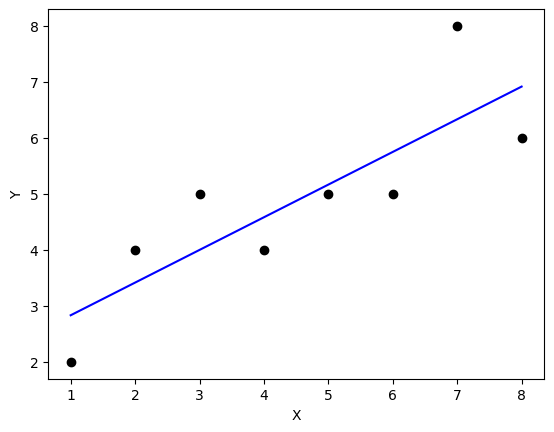

0.58
2.25
5.75


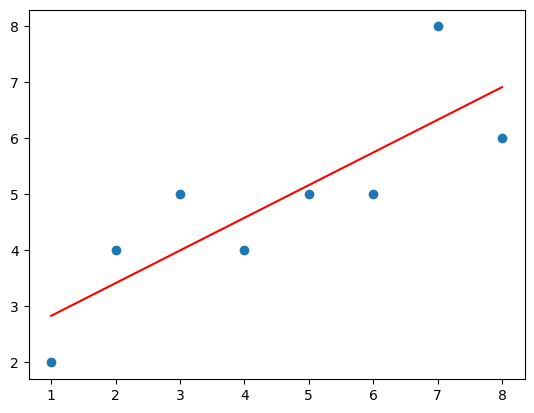

In [13]:
# First, you can use the matplotlib, numpy, and sklearn modules
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# matplotlib
class SimpleLinearRegression():  # ax + b = 0
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.slope = self.get_slope()
        self.intercept = self.get_intercept()

    def get_slope(self):
        n = len(self.x)
        sum_xy = sum([self.x[i] * self.y[i] for i in range(n)])
        sum_x = sum(self.x)
        sum_y = sum(self.y)
        sum_x2 = sum([x ** 2 for x in self.x])
        mean_x = sum_x / n
        mean_y = sum_y / n
        numerator = sum_xy - n * mean_x * mean_y
        denominator = sum_x2 - n * mean_x ** 2
        return numerator / denominator

    def get_intercept(self):
        n = len(self.x)
        mean_x = sum(self.x) / n
        mean_y = sum(self.y) / n
        return mean_y - self.slope * mean_x

    def predict(self, x_val):
        return self.slope * x_val + self.intercept

    def show_plot(self):
        plt.scatter(self.x, self.y, color='black')
        plt.plot(self.x, [self.predict(x) for x in self.x], color='blue')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()

# matplotlib / numpy / sklearn
class SimpleLinearRegression2():
  def __init__(self, x, y):
    self.x = np.array(x)
    self.y = np.array(y)
    self.slope = None
    self.intercept = None
    self.model = None

  def get_slope(self):
    if self.slope is None:
      n = len(self.x)
      numerator = np.sum(self.x * self.y) - n * np.mean(self.x) * np.mean(self.y)
      denominator = np.sum(self.x ** 2) - n * np.mean(self.x) ** 2
      self.slope = numerator / denominator
    return self.slope

  def get_intercept(self):
    if self.intercept is None:
      self.intercept = np.mean(self.y) - self.get_slope() * np.mean(self.x)
    return self.intercept

  def predict(self, x_new):
    if self.model is None:
      self.model = LinearRegression().fit(self.x.reshape(-1, 1), self.y.reshape(-1, 1))
    return self.model.predict(np.array(x_new).reshape(-1, 1))[0][0]

  def show_plot(self):
    plt.scatter(self.x, self.y)
    plt.plot(self.x, self.get_slope() * self.x + self.get_intercept(), color='red')
    plt.show()



# secondly, you can use the least-squares estimation method, 최소 제곱 추정법
# you can find the best-fitting line by calculating 
# the slope (a) and intercept (b) using these formulas: a 기울기 b 절편

# Slope (a):
# a = (Σ(x*y) - n * mean(x) * mean(y)) / (Σ(x^2) - n * mean(x)^2) n 데이터 쌍의 수

# Intercept (b):
# b = mean(y) - a * mean(x)


def main():
  x = [1, 2, 3, 4, 5, 6, 7, 8]
  y = [2, 4, 5, 4, 5, 5, 8, 6]

  regression = SimpleLinearRegression(x, y)
  print('{:.2f}'.format(regression.get_slope()))          # a
  print('{:.2f}'.format(regression.get_intercept()))      # b
  print('{:.2f}'.format(regression.predict(6)))           

  regression.show_plot()

  regression2 = SimpleLinearRegression2(x, y)
  print('{:.2f}'.format(regression2.get_slope()))          # a
  print('{:.2f}'.format(regression2.get_intercept()))      # b
  print('{:.2f}'.format(regression2.predict(6)))

  regression2.show_plot()

main()